In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB


In [3]:
base_risco_credito = pd.read_csv('risco_credito.csv')

In [4]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values


In [5]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()


In [7]:
X_risco_credito[:, 0] = label_enconder_historia.fit_transform(X_risco_credito[:, 0])

In [8]:
X_risco_credito[:, 1] = label_enconder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_enconder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_enconder_renda.fit_transform(X_risco_credito[:, 3])

In [9]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [10]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [11]:
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [12]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [13]:
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [14]:
print(previsao)

['baixo' 'moderado']


In [15]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [18]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [19]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [20]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [21]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

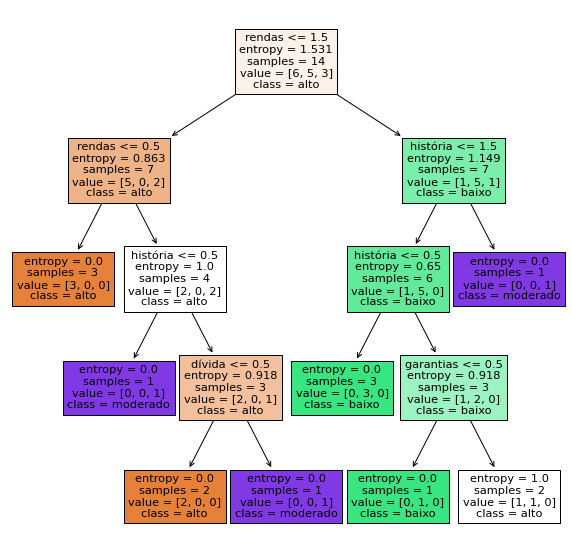

In [22]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'rendas']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_,filled=True);


In [23]:
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2, 0, 0, 0]])

In [24]:
previsoes

array(['baixo', 'alto'], dtype=object)

In [26]:
import Orange

In [27]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

In [28]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [29]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [30]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [32]:
for regras in regras_risco_credito.rule_list:
    print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [33]:
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])

In [34]:
previsoes

array([1, 0], dtype=int64)

In [36]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [37]:
for i in previsoes:
    print(base_risco_credito.domain.class_var.values[i])

baixo
alto


In [40]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [42]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis=0)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logistic_risco_credito = LogisticRegression(random_state=1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [45]:
logistic_risco_credito.intercept_

array([-0.80828993])

In [46]:
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [48]:
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

In [50]:
from sklearn.svm import SVC

In [51]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)